### 1.  Import Required Libraries
Import the necessary libraries, including NumPy, pandas, Keras, and matplotlib.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt

### 2.  Set Random Seed
Set the random seed for reproducibility.

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

### 3.  Generate Dummy Data
Generate dummy data for the independent and dependent variables.

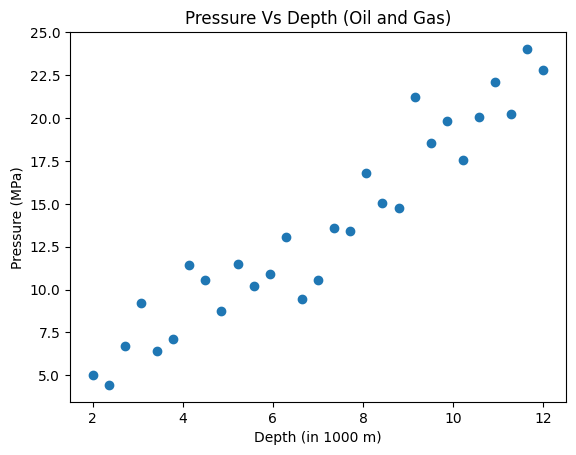

In [3]:
# Generate dummy data
n = 29  # Number of datapoints
x = np.linspace(2, 12, n)  # Independent variable
y = 2 * x + np.random.normal(0, 2, n)  # Dependent variable with Gaussian noise

# Create a DataFrame
data = pd.DataFrame({'Depth (m)': x, 'Pressure (MPa)': y})  # Rename columns here with correct units

# Plot the data
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()

### 4.  Create DataFrame
Create a DataFrame from the generated data.

In [4]:
# Create a DataFrame from the generated data
data = pd.DataFrame({'Depth (m)': x, 'Pressure (MPa)': y})

# Display the first few rows of the DataFrame
data.head()

,Depth (m),Pressure (MPa)
0,2.000000,4.993428
1,2.357143,4.437757
2,2.714286,6.723949
3,3.071429,9.188917
4,3.428571,6.388836


### 5.  Define the Model
Define the model using Keras. The model is a simple linear regression model with one input and one output.

In [5]:
# Define the model
model = Sequential()  # Initialize a Sequential model
model.add(Input(shape=(1,)))  # Add an Input layer with one input
model.add(Dense(1))  # Add a Dense layer with one output

### 6.  Compile the Model
Compile the model with the Adam optimizer and mean squared error loss function.

In [6]:
# Define the optimizer
optimizer = Adam(learning_rate=0.1)  # Use the Adam optimizer with a learning rate of 0.1

# Compile the model
model.compile(loss='mean_squared_error',  # Use mean squared error as the loss function
              optimizer=optimizer,  # Use the defined optimizer
              metrics=['mean_squared_error', 'mean_absolute_error'])  # Track mean squared error and mean absolute error during training

# Question for students: What does each line in this code block do?
# Prompt for students: Try changing the learning rate of the optimizer. How does it affect the model's performance?

### 7.  Model summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 8.  Random Model Weights

In [8]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.07245672]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

### 9.  Fit the Model
Fit the model to the data.

In [9]:
# Fit the model to the data
model.fit(data['Depth (m)'], data['Pressure (MPa)'], epochs=209, verbose=1)

# Prompt for students: Try changing the number of epochs. How does it affect the model's performance?

Epoch 1/209
1/1 [==============================] - 1s 611ms/step - loss: 201.2906 - mean_squared_error: 201.2906 - mean_absolute_error: 13.1237
Epoch 2/209
1/1 [==============================] - 0s 4ms/step - loss: 177.9614 - mean_squared_error: 177.9614 - mean_absolute_error: 12.3237
Epoch 3/209
1/1 [==============================] - 0s 2ms/step - loss: 156.1356 - mean_squared_error: 156.1356 - mean_absolute_error: 11.5253
Epoch 4/209
1/1 [==============================] - 0s 2ms/step - loss: 135.8356 - mean_squared_error: 135.8356 - mean_absolute_error: 10.7300
Epoch 5/209
1/1 [==============================] - 0s 4ms/step - loss: 117.0781 - mean_squared_error: 117.0781 - mean_absolute_error: 9.9391
Epoch 6/209
1/1 [==============================] - 0s 1ms/step - loss: 99.8722 - mean_squared_error: 99.8722 - mean_absolute_error: 9.1542
Epoch 7/209
1/1 [==============================] - 0s 3ms/step - loss: 84.2188 - mean_squared_error: 84.2188 - mean_absolute_error: 8.3771
Epoch 8/209

### 10.  Trained Model Weights

In [10]:
print(f'Trained Model Weights: {model.get_weights()}\n')
print(f'Trained Model Weights slope value: {model.get_weights()[0][0][0]: .4f}')
print(f'Trained Model Weights Intercept / Bias value: {model.get_weights()[1][0]: .4f}')

Trained Model Weights: [array([[1.7593259]], dtype=float32), array([1.345562], dtype=float32)]

Trained Model Weights slope value:  1.7593
Trained Model Weights Intercept / Bias value:  1.3456


### 11.  Predict the Pressure Values
Use the trained model to predict the pressure values.

In [11]:
# Predict the pressure values
predictions = model.predict(data['Depth (m)'])

# Display the first few predicted values
print(predictions[:5])

# Question for students: What do these predicted values represent?
# Prompt for students: Try predicting the pressure values for different depths. How do the predicted values change?

1/1 [==============================] - 0s 131ms/step
[[4.864214 ]
 [5.4925447]
 [6.120875 ]
 [6.7492056]
 [7.3775363]]


### 12.  Plot the Regression Curve
Plot the regression curve along with the original data.

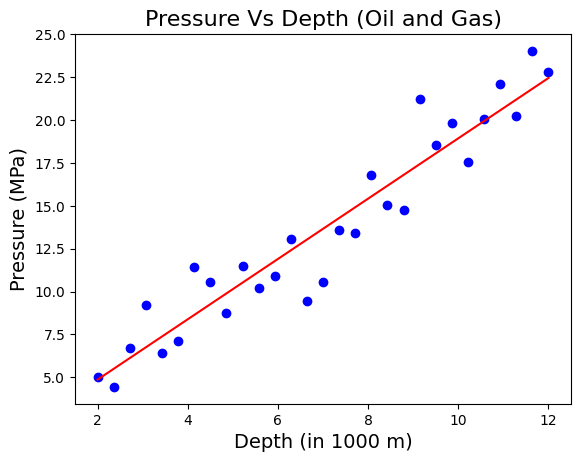

In [12]:
# Plot the regression curve along with the original data
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'], color='blue')  # Plot the original data points
plt.plot(data['Depth (m)'], predictions, color='red')  # Plot the regression curve
plt.xlabel('Depth (in 1000 m)', fontsize=14)  # Set the x-axis label
plt.ylabel('Pressure (MPa)', fontsize=14)  # Set the y-axis label
plt.title('Pressure Vs Depth (Oil and Gas)', fontsize=16)  # Set the title
plt.show()  # Display the plot

# Question for students: What does the red line represent in this plot?

### 13.  Calculate MSE, RMSE, MAE
Calculate the mean squared error, root mean squared error, and mean absolute error of the predictions.

In [13]:
# Calculate MSE, RMSE, MAE
mse = np.mean((predictions.ravel() - data['Pressure (MPa)'])**2)  # Calculate the mean squared error
rmse = np.sqrt(mse)  # Calculate the root mean squared error
mae = np.mean(np.abs(predictions.ravel() - data['Pressure (MPa)']))  # Calculate the mean absolute error

# Print the calculated metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# Question for students: What do these metrics represent?

MSE: 2.8386754531869838
RMSE: 1.684836921837536
MAE: 1.390579772008783


### 14.  Predict Pressure at Specific Depth
Use the model to predict the pressure at a specific depth.

In [14]:
# Predict the pressure at a specific depth
depth = np.array([[7]])  # Define the depth at which to predict the pressure
pressure_pred = model.predict(depth)  # Use the model to predict the pressure at the specified depth

# Print the predicted pressure
print("The predicted pressure at a depth of 7 is:", pressure_pred[0][0])
# Prompt for students: Try predicting the pressure at different depths. How do the predicted values change?

1/1 [==============================] - 0s 91ms/step
The predicted pressure at a depth of 7 is: 13.660843


### 15.  Plot Data, prediction point with Dashed Lines
Plot the data and the regression line, along with a point for the predicted pressure at a specific depth and dashed lines to this point.

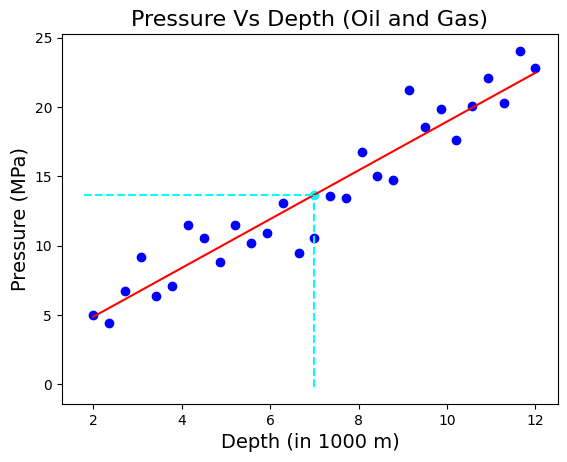

In [15]:
# Plot the data, the regression curve, and the predicted pressure
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'], color='blue')  # Plot the original data points
plt.plot(data['Depth (m)'], predictions, color='red')  # Plot the regression curve
plt.scatter(depth.ravel(), pressure_pred.ravel(), color='cyan')  # Plot the predicted pressure

# Create arrays for the dashed lines
depth_val = depth.ravel()[0]
pressure_val = pressure_pred.ravel()[0]
vertical_line = np.array([depth_val, depth_val])
horizontal_line = np.array([1.8, depth_val])
pressure_line = np.array([-0.2, pressure_val])

# Plot the dashed lines
plt.plot(vertical_line, pressure_line, color='cyan', linestyle='dashed')
plt.plot(horizontal_line, np.array([pressure_val, pressure_val]), color='cyan', linestyle='dashed')

# Set the labels and title
plt.xlabel('Depth (in 1000 m)', fontsize=14)
plt.ylabel('Pressure (MPa)', fontsize=14)
plt.title('Pressure Vs Depth (Oil and Gas)', fontsize=16)

# Display the plot
plt.show()

# Question for students: What does the cyan point represent in this plot?